In [258]:
import pandas as pd
import math
import numpy as np
pd.set_option("display.max_rows", 500, "display.max_columns", 500)

In [259]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.metrics import MeanSquaredError
from sklearn.metrics import r2_score
import math

In [260]:
df = pd.read_csv('data_output.csv', low_memory=False)
df.head(10)

,Neutroticism:Anxiety,Neutroticism:Angry Hostility,Neutroticism:Depression,Neutroticism:Self-Consciousness,Neutroticism:Impulsiveness,Neutroticism:Vulnerability,Extraversion:Warmth,Extraversion:Gregariousness,Extraversion:Assertiveness,Extraversion:Activity,Extraversion:Excitement-Seeking,Extraversion:Positive Emotions,Openness:Fantasy,Openness:Aesthetics,Openness:Feelings,Openness:Actions,Openness:Ideas,Openness:Values,Agreeableness:Trust,Agreeableness:Straightforwardness,Agreeableness:Altruism,Agreeableness:Compliance,Agreeableness:Modesty,Agreeableness:Tender-Mindedness,Conscientiousness:Competence,Conscientiousness:Order,Conscientiousness:Dutifulness,Conscientiousness:Achievement Striving,Conscientiousness:Self-Discipline,Conscientiousness:Deliberation,Novelty Seeking:Exploratory Excitability,Novelty Seeking:Impulsiveness,Novelty Seeking:Extravagance,Novelty Seeking:Disorderliness,Harm avoidance:Worry & pessimism,Harm avoidance:Fear of uncertainty,Harm avoidance:Shyness with strangers,Harm avoidance:Fatigability & asthenia,Reward dependence:Sentimentality,Reward dependence:Warm communication,Reward dependence:Attachment,Reward dependence:Dependence,Persistence:Eagerness of effort,Persistence:Work hardened,Persistence:Ambitious,Persistence:Perfectionist,Self-directedness:Responsibility,Self-directedness:Purposefulness,Self-directedness:Resourcefulness,Self-directedness:Self-acceptance,Self-directedness:Enlightened second nature,Cooperativeness:Social acceptance,Cooperativeness:Empathy,Cooperativeness:Helpfulness,Cooperativeness:Compassion,Cooperativeness:Pure-hearted conscience,Self-transcendence:Self-forgetful,Self-transcendence:Transpersonal identification,Self-transcendence:Spiritual acceptance,Primary Trait Dimensions:Well-being,Primary Trait Dimensions:Social Potency,Primary Trait Dimensions:Achievement,Primary Trait Dimensions:Social Closeness,Primary Trait Dimensions:Stress Reaction,Primary Trait Dimensions:Aggression,Primary Trait Dimensions:Alienation,Primary Trait Dimensions:Control,Primary Trait Dimensions:Harm-avoidance,Primary Trait Dimensions:Traditionalism,Primary Trait Dimensions:Absorption,Folk Scales:Dominance,Folk Scales:Capacity for Status,Folk Scales:Sociability,Folk Scales:Social Presence,Folk Scales:Self-acceptance,Folk Scales:Independance,Folk Scales:Empathy,Folk Scales:Responsibility,Folk Scales:Socialization,Folk Scales:Self-control,Folk Scales:Good Impression,Folk Scales:Communality,Folk Scales:Well-being,Folk Scales:Tolerance,Folk Scales:Achievement via Conformance,Folk Scales:Achievement via Independence,Folk Scales:Intellectual Efficiency,Folk Scales:Psychological-mindedness,Folk Scales:Flexibility,Folk Scales:Femininity,Special Purpose Scales:Managerial Potential,Special Purpose Scales:Work Orientation,Special Purpose Scales:Creative Temperament,Special Purpose Scales:Leadership,Special Purpose Scales:Amicability,Special Purpose Scales:Law Enforcement Orientation,Special Purpose Scales:Tough-mindedness,Honesty-Humility:Sincerity,Honesty-Humility:Fairness,Honesty-Humility:Greed Avoidance,Honesty-Humility:Modesty,Emotionality:Fearfulness,Emotionality:Anxiety,Emotionality:Dependence,Emotionality:Sentimentality,eXtraversion:Expressiveness,eXtraversion:Social Boldness,eXtraversion:Sociability,eXtraversion:Liveliness,Agreeableness:Forgiveness,Agreeableness:Gentleness,Agreeableness:Flexibility,Agreeableness:Patience,Concienciousness:Organization,Concienciousness:Diligence,Concienciousness:Perfectionism,Concienciousness:Prudence,Openness to Experience:Aesthetic Appreciation,Openness to Experience:Inquisitiveness,Openness to Experience:Creativity,Openness to Experience:Unconventionality,Scales:Complexity,Scales:Breadth of Interest,Scales:Innovation,Scales:Tolerance,Scales:Empathy,Scales:Anxiety,Scales:Cooperativeness,Scales:Sociability,Scales:Social Confidence,Scales:Energy Level,Scales:Social Astuteness,Scales:Risk Taking,Scales:Organization,Scales:Traditional Values,Scales:Responsibility,Extraversion

In [261]:
cols = df.columns
categories = []
for i in range (len(cols)):
    if i == 0:
        categories.append(cols[i][:np.char.find(cols[i], ':')])
    else:
        if cols[i][:np.char.find(cols[i], ':')] != cols[i-1][:np.char.find(cols[i-1], ':')]:
            categories.append(cols[i][:np.char.find(cols[i], ':')])

categories

['Neutroticism',
 'Extraversion',
 'Openness',
 'Agreeableness',
 'Conscientiousness',
 'Novelty Seeking',
 'Harm avoidance',
 'Reward dependence',
 'Persistence',
 'Self-directedness',
 'Cooperativeness',
 'Self-transcendence',
 'Primary Trait Dimensions',
 'Folk Scales',
 'Special Purpose Scales',
 'Honesty-Humility',
 'Emotionality',
 'eXtraversion',
 'Agreeableness',
 'Concienciousness',
 'Openness to Experience',
 'Scales',
 'Extraversion',
 'Agreeableness',
 'Independence',
 'Openness to Experince',
 'Methodicalness',
 'Industriousness',
 'Adjustment',
 'Ambition',
 'Sociability',
 'Interpersonal Sensitivity',
 'Prudence',
 'Learning Approach']

In [262]:
def my_round(i):
    f = math.floor(i)
    return f if i - f < 0.5 else f+1

In [263]:
avg_list = []
temp = []
for index, row in df.iterrows():
    temp_list = []
    count = 0
    for c in cols:
        if c[:np.char.find(c, ':')] == categories[count]:
            temp_list.append(row[c])
        else:
            temp.append(my_round(np.average(temp_list)))
            temp_list = [row[c]]
            count+=1
    temp.append(my_round(np.average(temp_list)))
    avg_list.append(temp)
    temp = []


new_df = pd.DataFrame(avg_list, columns = categories)

new_df.insert(0, 'Result_ID', range(0, 0 + len(new_df)))
new_df



,Result_ID,Neutroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Novelty Seeking,Harm avoidance,Reward dependence,Persistence,Self-directedness,Cooperativeness,Self-transcendence,Primary Trait Dimensions,Folk Scales,Special Purpose Scales,Honesty-Humility,Emotionality,eXtraversion,Agreeableness,Concienciousness,Openness to Experience,Scales,Extraversion,Agreeableness,Independence,Openness to Experince,Methodicalness,Industriousness,Adjustment,Ambition,Sociability,Interpersonal Sensitivity,Prudence,Learning Approach
0,0,46,14,53,69,53,22,72,19,28,49,55,30,39,35,42,75,38,3,53,59,54,33,11,57,81,42,79,43,53,30,13,41,51,23
1,1,27,37,61,52,62,46,38,34,44,65,48,19,41,66,68,36,29,33,33,61,56,45,28,27,67,64,77,45,65,64,42,39,46,64
2,2,92,43,85,39,46,61,74,60,63,13,59,64,63,31,12,14,69,48,33,49,92,57,53,13,55,93,53,43,8,30,54,63,36,60
3,3,70,83,68,44,65,65,38,54,68,47,54,89,70,52,42,8,51,87,34,67,89,66,84,29,37,88,69,49,41,65,89,65,30,71
4,4,81,57,87,40,32,87,76,38,48,45,45,67,54,55,40,18,73,55,20,28,94,60,60,20,53,98,21,41,18,59,68,45,23,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,75,26,67,61,43,42,75,37,47,34,59,40,47,40,34,83,56,19,57,46,75,48,17,50,60,72,45,52,35,29,29,44,47,67
2013,2013,71,23,60,64,33,48,76,32,35,41,60,66,45,37,32,77,56,19,46,38,69,44,11,42,66,58,40,40,37,28,26,48,44,35
2014,2014,69,78,85,63,61,48,47,74,68,43,67,62,63,59,44,53,73,87,57,60,88,67,82,43,18,82,59,51,36,61,77,81,53,81
2015,2015,61,18,78,67,56,29,84,34,52,39,59,49,54,42,40,83,63,10,55,64,73,49,13,49,49,73,81,54,39,23,29,58,57,71


In [264]:
data = pd.read_csv('data.csv', sep ='\t', low_memory=False)
data.head(10)

for c in data.columns:
    if c[-1:] == 'E' or  c[-1:] == 'I':
        data.drop(c, axis = 1, inplace = True)

questions = data.columns
data.insert(0, 'Response_ID', range(0, 0 + len(df)))
questions

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       ...
       'Q172A', 'Q173A', 'Q174A', 'Q175A', 'Q176A', 'Q177A', 'Q178A', 'Q179A',
       'Q180A', 'Q181A'],
      dtype='object', length=181)

In [265]:
trait = 'Persistence'
reg_df = data.merge(new_df[['Result_ID',trait]], left_on='Response_ID', right_on='Result_ID')
reg_df

,Response_ID,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Q43A,Q44A,Q45A,Q46A,Q47A,Q48A,Q49A,Q50A,Q51A,Q52A,Q53A,Q54A,Q55A,Q56A,Q57A,Q58A,Q59A,Q60A,Q61A,Q62A,Q63A,Q64A,Q65A,Q66A,Q67A,Q68A,Q69A,Q70A,Q71A,Q72A,Q73A,Q74A,Q75A,Q76A,Q77A,Q78A,Q79A,Q80A,Q81A,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,Q92A,Q93A,Q94A,Q95A,Q96A,Q97A,Q98A,Q99A,Q100A,Q101A,Q102A,Q103A,Q104A,Q105A,Q106A,Q107A,Q108A,Q109A,Q110A,Q111A,Q112A,Q113A,Q114A,Q115A,Q116A,Q117A,Q118A,Q119A,Q120A,Q121A,Q122A,Q123A,Q124A,Q125A,Q126A,Q127A,Q128A,Q129A,Q130A,Q131A,Q132A,Q133A,Q134A,Q135A,Q136A,Q137A,Q138A,Q139A,Q140A,Q141A,Q142A,Q143A,Q144A,Q145A,Q146A,Q147A,Q148A,Q149A,Q150A,Q151A,Q152A,Q153A,Q154A,Q155A,Q156A,Q157A,Q158A,Q159A,Q160A,Q161A,Q162A,Q163A,Q164A,Q165A,Q166A,Q167A,Q168A,Q169A,Q170A,Q171A,Q172A,Q173A,Q174A,Q175A,Q176A,Q177A,Q178A,Q179A,Q180A,Q181A,Result_ID,Persistence
0,0,5,2,1,2,5,2,4,4,2,4,2,4,6,3,1,6,2,1,4,1,7,1,4,5,2,2,5,2,3,7,7,2,2,4,2,1,7,1,3,2,7,6,2,2,6,2,6,4,5,3,3,2,2,2,2,4,5,3,3,4,6,4,6,3,2,2,7,2,2,4,4,5,1,2,2,4,6,2,6,3,5,2,3,6,7,2,4,1,2,2,5,2,6,2,6,7,2,2,1,4,2,7,6,6,2,2,6,2,7,1,3,6,7,2,7,3,4,2,2,1,6,6,2,1,3,6,2,2,6,2,6,5,2,5,6,2,2,2,2,6,5,7,6,3,6,2,3,3,2,1,2,6,1,2,6,4,1,4,6,6,4,4,2,1,2,3,4,7,2,1,7,2,4,2,6,7,6,1,1,3,4,0,28
1,1,6,2,2,6,2,2,6,3,6,5,6,5,6,2,2,5,5,1,2,2,2,3,2,5,3,2,5,5,3,6,5,3,3,3,2,1,6,2,7,5,6,2,2,5,2,3,3,2,2,5,5,2,1,1,6,3,1,5,2,2,5,2,2,3,2,5,7,6,5,2,2,1,1,5,2,3,5,6,2,2,5,2,6,3,6,6,2,2,6,1,5,6,7,6,5,2,5,2,6,3,3,6,3,3,5,5,1,5,6,5,3,6,6,2,2,3,2,2,2,5,6,6,3,5,2,3,6,3,1,2,5,5,3,2,7,2,5,2,2,6,6,5,2,2,5,2,3,3,3,2,2,6,5,6,5,1,1,6,6,2,2,2,6,5,2,3,5,3,2,1,6,5,6,6,2,3,3,5,1,2,5,1,44
2,2,1,1,1,7,5,4,1,7,7,5,3,7,7,3,7,7,5,1,7,7,7,4,5,7,4,1,7,7,7,7,7,3,7,2,5,7,7,5,7,7,5,4,7,4,1,5,1,7,7,7,4,2,5,1,4,1,7,7,1,7,7,2,7,5,7,4,7,7,7,3,7,7,4,1,7,7,7,7,7,7,3,7,1,3,7,7,1,7,4,7,7,7,7,5,2,7,7,2,7,5,5,7,7,1,4,7,6,7,7,6,5,4,7,4,5,7,7,7,7,7,7,7,7,7,7,3,7,7,7,7,7,7,6,7,7,7,6,1,1,7,7,7,1,6,7,1,7,7,7,1,7,7,7,7,6,4,1,5,7,7,2,7,7,2,4,6,7,2,4,5,7,3,4,7,7,3,7,7,7,7,7,2,63
3,3,2,6,6,7,2,7,2,5,6,6,7,6,6,3,4,6,7,2,6,6,2,7,5,6,7,2,7,6,7,4,1,6,6,6,6,6,2,7,6,6,6,5,6,7,2,6,6,6,6,6,6,6,7,7,6,2,5,6,6,6,6,2,5,7,7,6,3,6,7,2,5,6,7,7,6,7,6,6,2,5,5,2,2,1,2,7,2,7,7,2,1,7,6,7,6,2,7,7,6,2,7,5,1,1,6,5,2,7,7,6,7,6,2,6,6,2,1,7,6,7,3,7,2,7,2,6,6,4,6,7,7,6,6,6,4,2,4,2,1,7,6,6,7,1,2,1,6,6,6,2,1,5,7,7,2,7,6,6,7,4,6,5,7,7,4,7,2,7,4,6,5,7,6,6,5,1,6,1,1,5,6,3,68
4,4,1,7,5,7,7,3,5,1,7,4,2,7,1,1,7,7,5,2,6,7,1,2,3,7,7,2,7,7,7,5,7,4,7,7,6,4,7,6,3,5,2,1,7,7,5,7,6,1,2,2,2,6,1,1,7,7,7,7,2,7,1,1,3,7,6,2,3,7,7,6,7,2,2,1,7,7,7,7,7,6,2,1,2,1,3,7,1,2,2,7,7,7,3,7,7,7,5,7,6,2,7,5,7,2,1,7,1,1,2,7,6,1,2,5,7,4,6,7,6,7,5,4,7,7,2,6,7,7,6,7,1,7,7,6,2,6,6,1,1,5,3,7,6,1,2,2,7,7,7,1,2,6,7,7,2,3,2,7,7,6,1,6,7,7,5,6,1,3,1,5,7,7,1,6,7,2,6,7,2,7,7,4,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,2,5,2,2,2,1,2,6,2,5,1,6,3,3,6,1,1,1,5,2,5,2,6,5,6,1,5,4,3,7,6,1,6,5,4,5,7,2,3,2,6,6,6,4,2,1,2,2,5,5,2,1,2,1,3,7,7,6,2,1,5,3,1,5,6,2,2,5,6,6,6,5,1,2,5,3,5,2,3,5,5,5,1,3,5,2,4,2,4,5,2,5,3,5,3,7,1,2,3,5,3,7,3,2,4,6,5,5,1,6,6,3,3,2,7,5,7,4,1,2,2,5,5,4,6,2,2,6,3,2,3,6,3,5,6,6,4,1,3,6,5,5,2,3,5,2,5,5,4,2,1,5,3,6,5,1,1,5,6,6,1,5,5,2,5,5,3,5,2,2,6,2,2,6,6,6,5,2,2,6,6,2012,47
2013,2013,2,

In [266]:
data = data.drop(['Response_ID'], axis = 1)
reg_df = reg_df.drop(['Response_ID', 'Result_ID'], axis = 1)
print(reg_df)
corr = reg_df.corr()
corr = corr[trait]
corr

      Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  Q11A  Q12A  Q13A  \
0       5    2    1    2    5    2    4    4    2     4     2     4     6   
1       6    2    2    6    2    2    6    3    6     5     6     5     6   
2       1    1    1    7    5    4    1    7    7     5     3     7     7   
3       2    6    6    7    2    7    2    5    6     6     7     6     6   
4       1    7    5    7    7    3    5    1    7     4     2     7     1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2012    2    5    2    2    2    1    2    6    2     5     1     6     3   
2013    2    5    2    2    3    2    2    6    2     3     2     5     3   
2014    1    5    6    6    3    6    3    1    4     5     4     6     6   
2015    1    1    2    2    4    1    2    6    6     6     2     4     4   
2016    1    5    2    6    5    3    4    5    2     5     2     7     6   

      Q14A  Q15A  Q16A  Q17A  Q18A  Q19A  Q20A  Q21A  Q22A  Q23A  Q24A  Q25

Q1A            0.136636
Q2A           -0.154709
Q3A            0.121282
Q4A            0.545465
Q5A            0.464563
Q6A            0.224945
Q7A           -0.010786
Q8A           -0.032281
Q9A           -0.014849
Q10A           0.193862
Q11A           0.137555
Q12A          -0.020824
Q13A           0.441652
Q14A           0.629117
Q15A          -0.196317
Q16A          -0.046155
Q17A          -0.033053
Q18A           0.017751
Q19A           0.065977
Q20A           0.115083
Q21A          -0.243441
Q22A           0.441221
Q23A           0.057000
Q24A          -0.106179
Q25A           0.691970
Q26A           0.007600
Q27A           0.135307
Q28A          -0.011409
Q29A          -0.185278
Q30A          -0.209572
Q31A          -0.409341
Q32A          -0.085178
Q33A          -0.207966
Q34A          -0.049321
Q35A          -0.175701
Q36A           0.046389
Q37A          -0.132845
Q38A           0.092691
Q39A           0.183381
Q40A           0.132725
Q41A           0.290992
Q42A          -0

In [267]:
high_relation_qs = []
for i in range(len(corr)-1):
    if abs(corr[i]) > 0.4:
        high_relation_qs.append(corr.index[i])

In [268]:
data[high_relation_qs]

,Q4A,Q5A,Q13A,Q14A,Q22A,Q25A,Q31A,Q48A,Q81A,Q101A,Q110A,Q116A,Q137A,Q141A,Q144A,Q145A,Q152A,Q167A
0,2,5,6,3,1,2,7,4,5,2,1,3,2,5,3,6,6,4
1,6,2,6,2,3,3,5,2,5,3,5,3,5,6,2,5,6,5
2,7,5,7,3,4,4,7,7,3,5,6,7,6,7,6,7,7,7
3,7,2,6,3,7,7,1,6,5,7,6,2,4,6,1,2,5,2
4,7,7,1,1,2,7,7,1,2,7,7,4,6,3,1,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2,2,3,3,2,6,6,2,5,3,6,5,4,5,3,5,5,3
2013,2,3,3,3,2,3,5,3,3,2,3,5,4,3,3,5,6,3
2014,6,3,6,3,6,4,2,3,6,6,6,3,7,3,3,2,6,6
2015,2,4,4,5,1,6,7,1,3,2,6,6,6,6,6,7,5,5


In [269]:
# X = data[data.columns].to_numpy()
# y = new_df["Neutroticism"].to_numpy()
inputs = data[high_relation_qs].shape[1]
inputs

18

In [270]:
def NN_model(inputs):
	# create model
	model = Sequential()
	# model.add(Dense(181, input_dim=181, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(150, activation='relu'))
	# model.add(Dense(100, activation='relu'))
	# model.add(Dense(50, activation='relu'))
	# model.add(Dense(1, kernel_initializer='normal'))


	model.add(Dense(inputs, input_dim=inputs, kernel_initializer='normal', activation='relu'))
	model.add(Dense(20, activation='relu'))
	model.add(Dense(15, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanSquaredError()])
	return model

In [271]:
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasRegressor(build_fn=NN_model, epochs=10, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=10)
# results = cross_val_score(pipeline, X, Y, cv=kfold)
# print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [272]:
X = data[high_relation_qs].to_numpy()
y = new_df[trait]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [274]:
model = NN_model(inputs)

In [275]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 3183.2588 - mean_squared_error: 3183.2588 - val_loss: 3064.2957 - val_mean_squared_error: 3064.2957
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 2089.5974 - mean_squared_error: 2089.5974 - val_loss: 490.0403 - val_mean_squared_error: 490.0403
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 155.3261 - mean_squared_error: 155.3261 - val_loss: 101.2631 - val_mean_squared_error: 101.2631
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 90.5098 - mean_squared_error: 90.5098 - val_loss: 78.6543 - val_mean_squared_error: 78.6543
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 74.2940 - mean_squared_error: 74.2940 - val_loss: 64.0100 - val_mean_squared_error: 64.0100
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 61.4343 - mean_squared_error: 61.4343 - val_loss: 52.4659 - val_mean_squared_error: 

In [276]:
y_predict = model.predict(X_test)

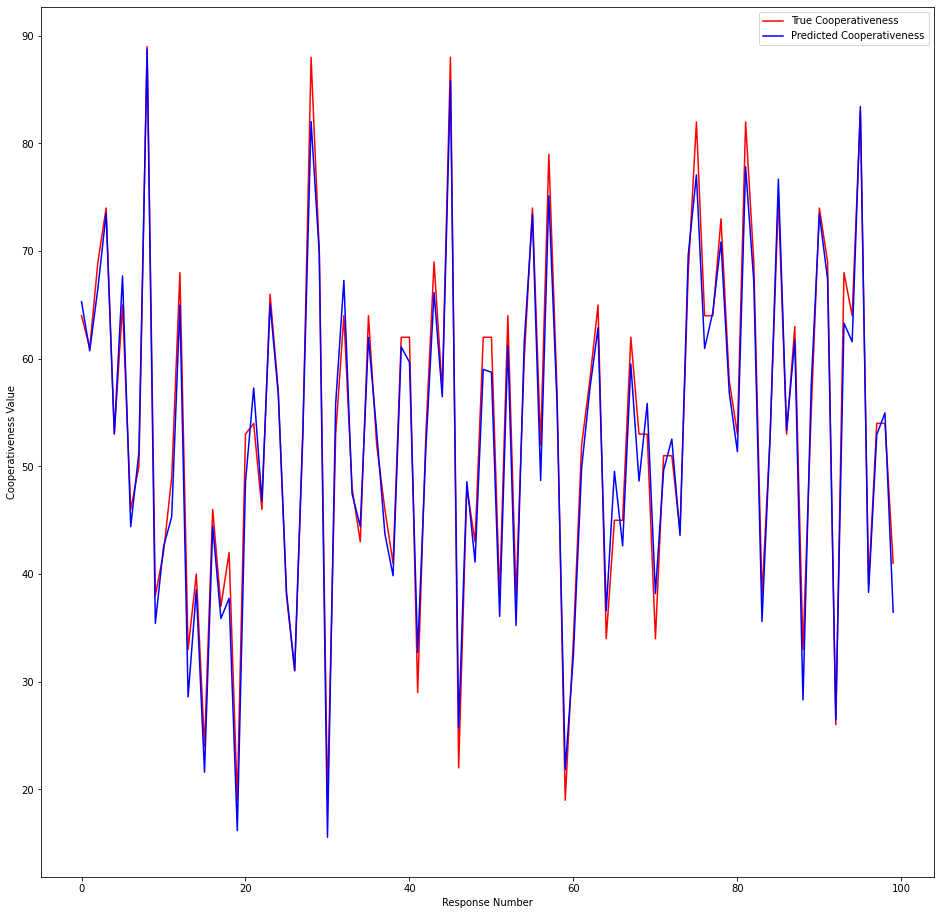

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.plot(range(100), y_test[:100], color="r", label="True Cooperativeness")
plt.plot(range(100), y_predict[:100], color="b", label="Predicted Cooperativeness")
plt.xlabel("Response Number")
plt.ylabel("Cooperativeness Value")
plt.legend()

In [278]:
r2_score(y_test, y_predict)

0.9772460949715919